In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [23]:
clients_df = pd.read_csv('customers.csv')
print('Number of clients: {}'.format(len(clients_df))) 

Number of clients: 7043


In [33]:
clients_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [40]:
a = clients_df.dtypes
clients_df.dtypes['customerID']

dtype('O')

In [36]:
clients_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


- Au niveau des counts, on a pas de cellules sans valeurs pour ces 3 pptés
- max(tenure) = 72

In [41]:
clients_df.describe(include = ['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,4393-GEADV,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


- Au niveau des counts, on a pas de cellules sans valeurs pour les autres pptés. Donc aucune case du tableau n'est vide. 
- unique nous indique qu'il y a bien 7043 lignes différentes dans le tableau. 
- freq nous indique quelle variable a le plus tendance de sortir. Pour gender, on a 3555 individu du même sex contre 3488 de l'autre sex. 
- top nous indique la variable correspondant a freq. Pour gender, on a 3555 fois la variable male. 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html?highlight=pandas%20dataframe%20describe#pandas.DataFrame.describe

In [45]:
#clients_df.isnull() # renvoie true si on a un NA
clients_df.isnull().sum() # renvoie pour chaque ppté, le nombre de NA

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

- Pas de NA, mais cette fonction indique uniquement les NA et ne prend pas en compte les chaines de caractères vide ''.
Avec ce qui a été conclu entre le nombre de count et la méthode isnull(), pas de NA dans notre tableau.

In [97]:
def check_answers(df):
    
    features = list(df.columns)             # crée une liste avec les labels des colonnes
    
    answers = {}
    
    for feature in features:                # on regarde pour chaque colonne
        list_answer = list(df[feature].unique())# list_answer contient une liste de tous les différents types d'une ppté        
        if len(list_answer) > float(len(df[feature])/4) or len(list_answer) == 1:
            #print(feature) # features écartées: customerID et TotalCharges
            continue       # on sort de l'itération si le nombre de réponses différentes > 7043/4 ou = 1
        counts = list(df[feature].value_counts()) # indique le nombre de chaque variable pour chaque feature
        answers[feature] = {list_answer[i]: counts[i] for i in range(len(list_answer))} 
        # associe la top value avec la freq dans chaque feature
        
        plt.figure(figsize=(15,5))
        plt.bar(range(len(list_answer)), answers[feature].values(), align='center', alpha=0.5)
        plt.xticks(range(len(list_answer)), answers[feature].keys())
        
        plt.title(feature)

        plt.show()
        
    #return answers

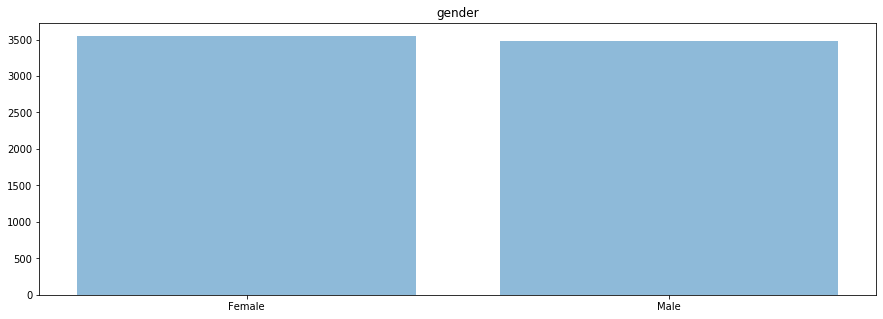

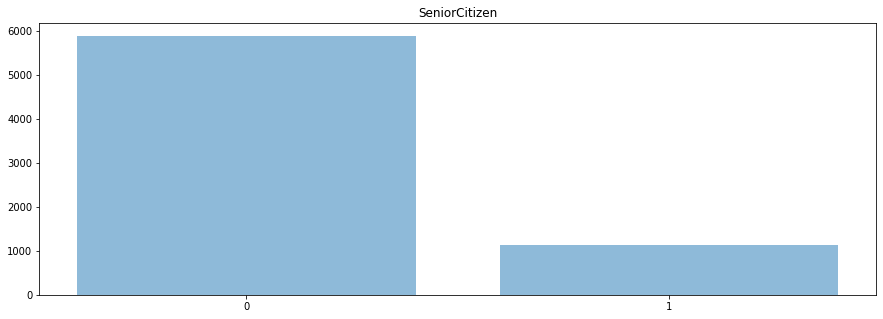

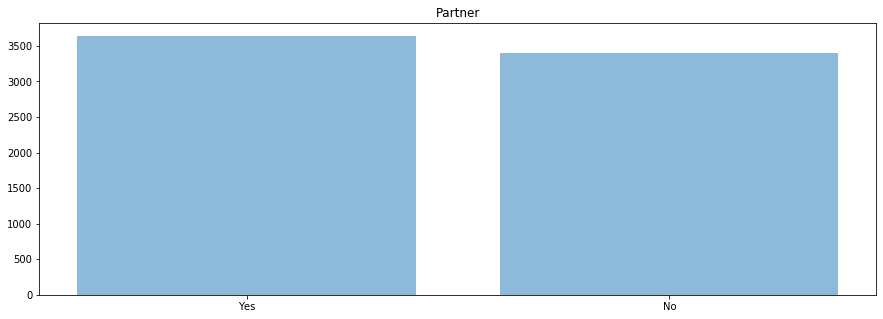

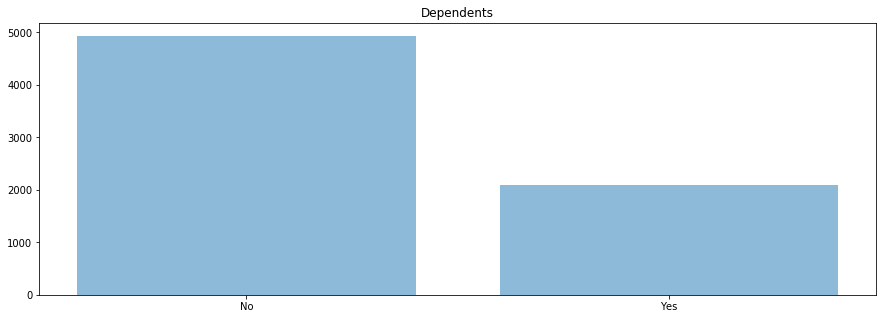

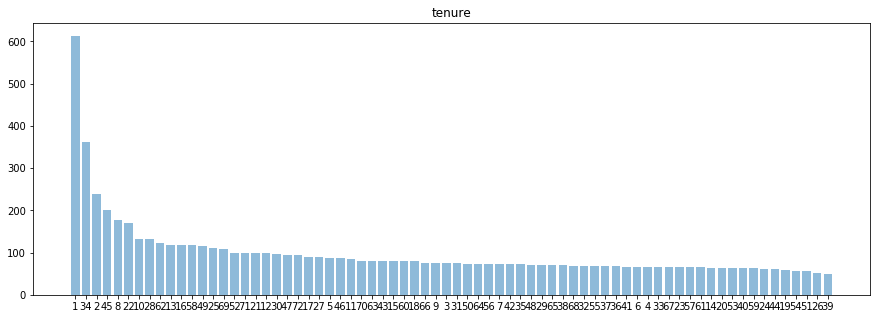

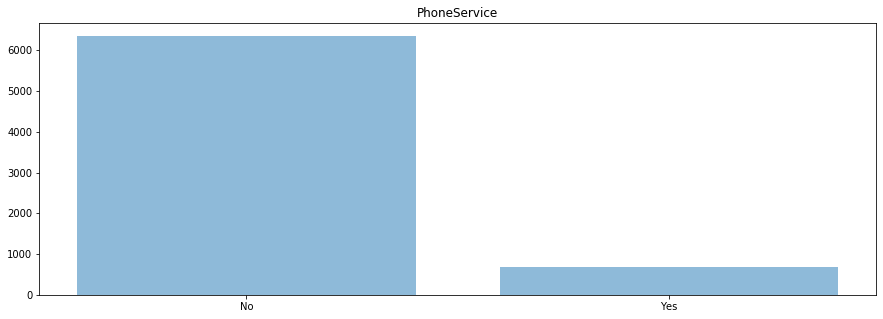

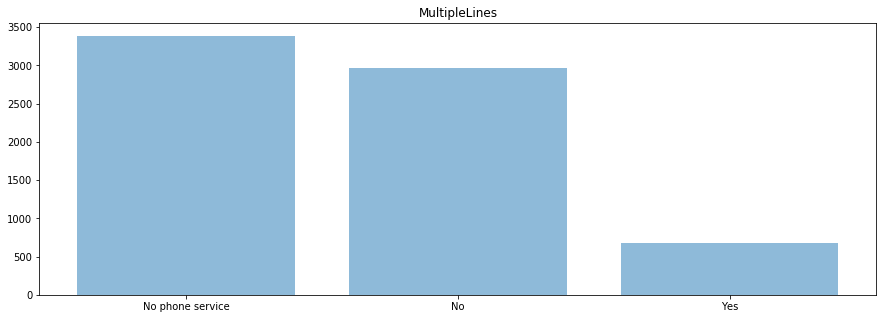

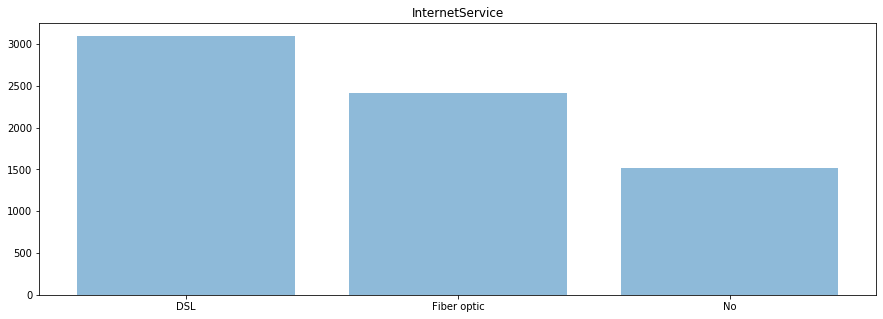

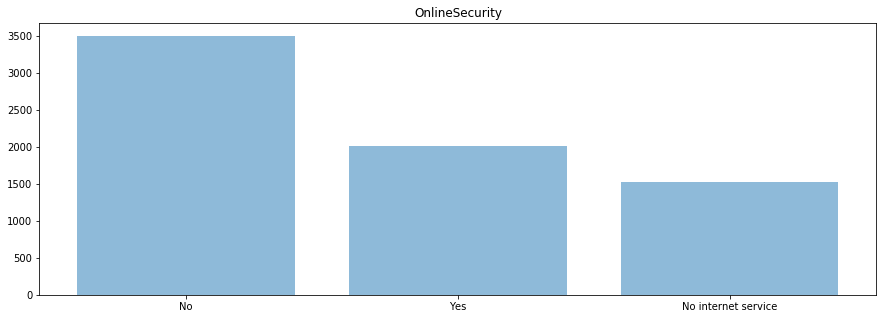

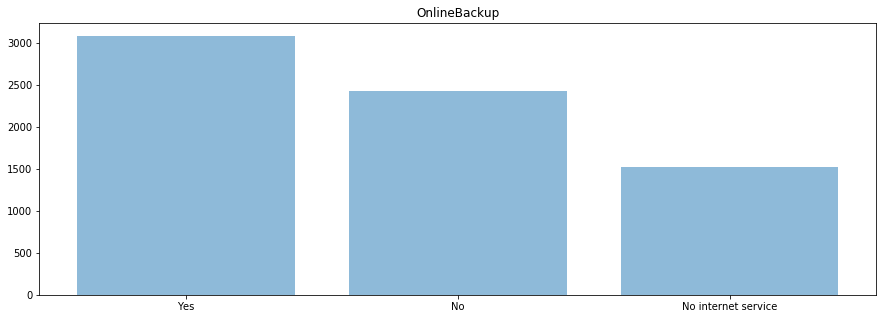

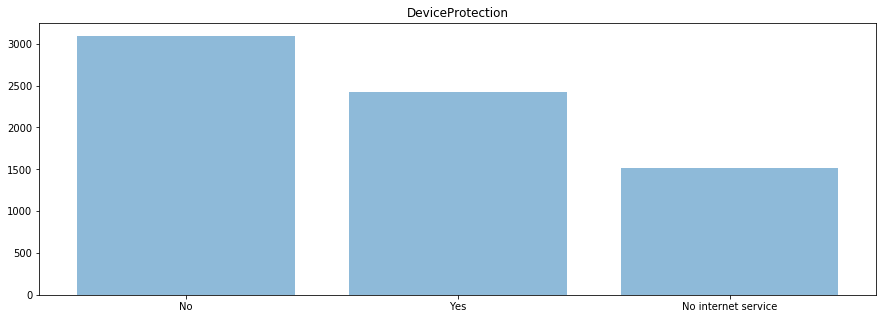

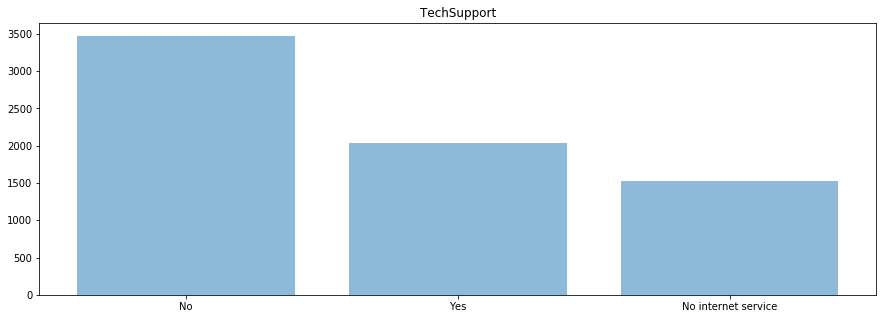

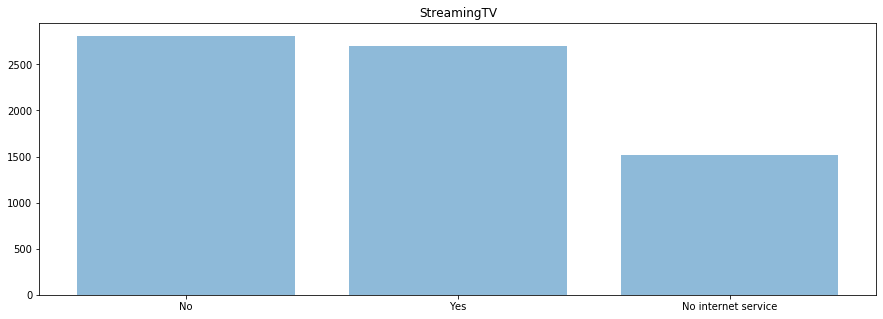

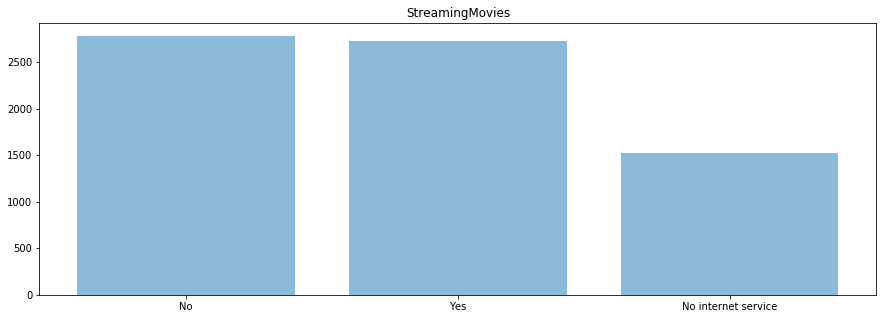

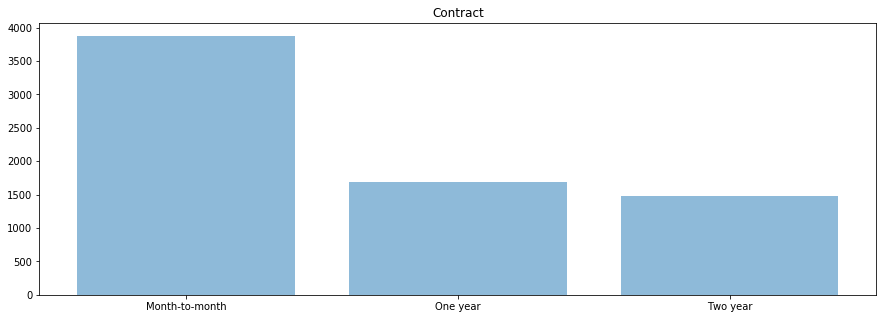

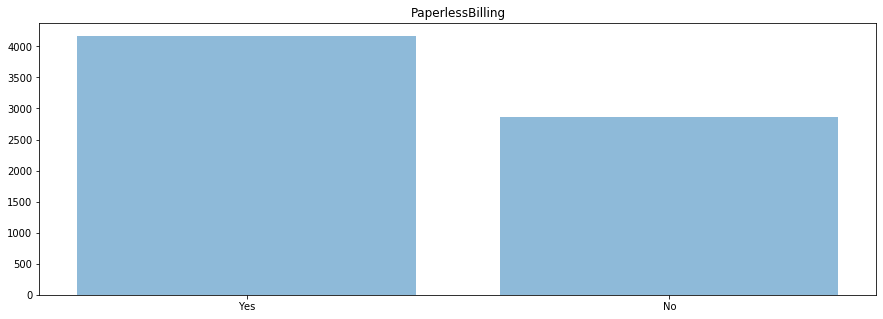

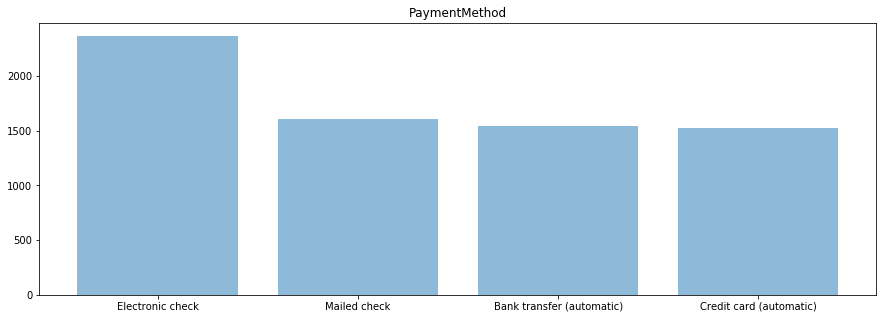

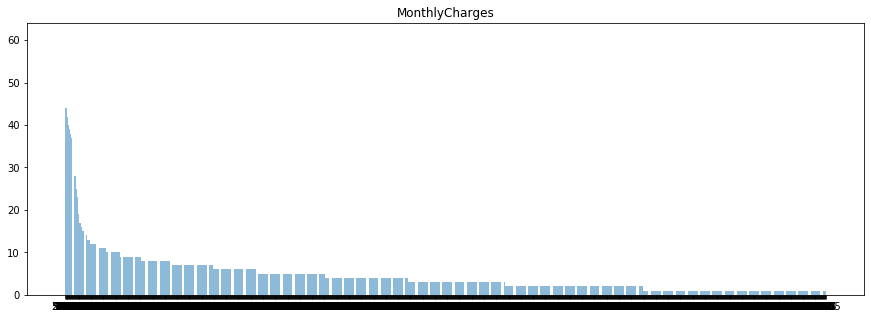

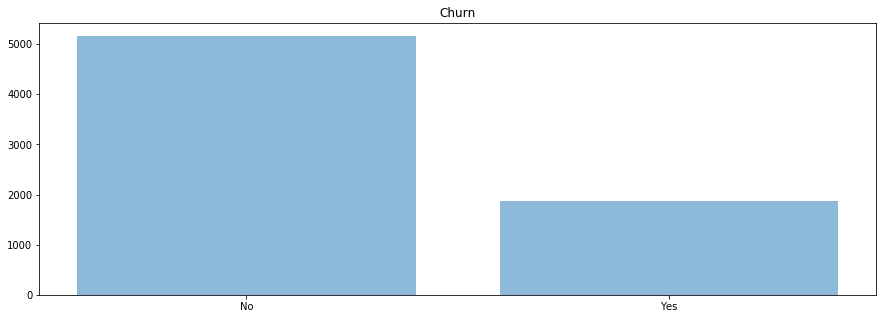

In [130]:
check_answers(clients_df)

- En utilisant check_answer(df), on écarte une feature si elle n'a qu'une seule réponse ou si elle a plus de 7043/4 réponse différentes. On a écarté customerID dont on s'en balec et TotalCharges. Mais quand on regarde tenure ou monthlyCharges, c'est difficile de juger la nature des datas. 
- Ploter et regarder ce qui est pertinent de garder ou modifier
- pas de réponses non expectée, pas de texte là ou on attend des int ou float et vice versa, 

## Cleaning missing values

On va vérifier si on a effectivement pas de missing values au niveau des TotalCharges. Inspiré du travail de Thévie

In [105]:
clients_df = clients_df[clients_df['TotalCharges'] != ' '] 
print(len(clients_df)) 
# clients_df ne contient plus que les lignes où TotalCharges contient une valeur numérique

7032


- On a 7032 lignes sorties à l'exécution de la dernière cell. => 11 missing values. En revenant à la cellule avec le plot du describe(include = ['O']), on remarque que freq(TotalCharges) = 11 est la valeur associée top(TotalCharges) = '  '. 

In [106]:
def check_missing(df):
    
    features = list(df.columns)
    for feature in features:
        df = df[df[feature] != ' '] 
        print(len(df))

In [107]:
check_missing(clients_df)

7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032
7032


Avec la fonction check_missing, on remarque que les autres features ne contiennent pas de missing values

## Feature type

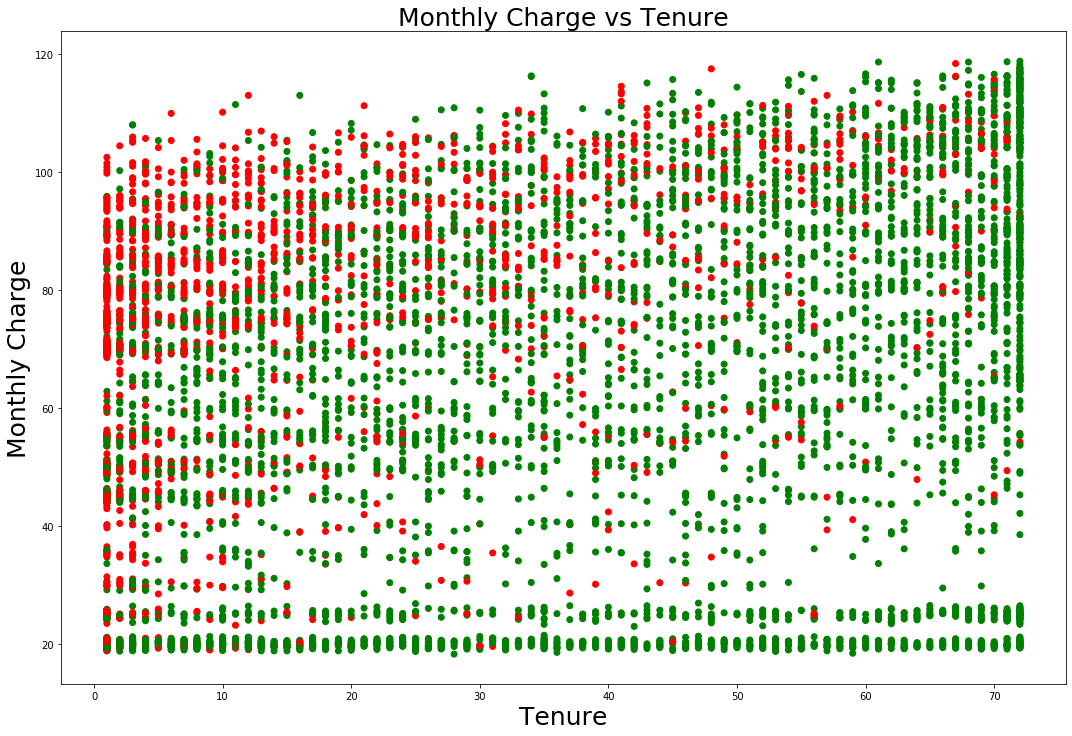

In [117]:
plt.figure(figsize=(18,12))
colors = np.array(['green', 'red'])[list(clients_df.Churn.replace({'Yes':1, 'No':0}))]
plt.scatter(list(clients_df.tenure),list(clients_df.MonthlyCharges) , c=colors)
plt.xlabel('Tenure', fontsize=25)
plt.ylabel('Monthly Charge', fontsize=25)
plt.title('Monthly Charge vs Tenure',fontsize=25 )
plt.show()

- À partir de ce plot, on peut déjà tirer plusieurs conclusions, cf jupyter de Thévie. 
- Dans la donnée, on nous indique que l'on veut se focaliser sur la rétention de clients donc le but pour la suite est de tirer des conclusion sur les données pour les utilisateurs qui n'ont pas churn. 

In [127]:
df_churn = clients_df[clients_df.Churn == 'Yes']
df_stay = clients_df[clients_df.Churn == 'No'] # nombre de cliens fidèles
print(len(df_churn)/(len(df_stay)+len(df_churn))) # ratio
client_df = df_stay

0.26578498293515357


## Categorical variables

Expliquer pourquoi on analyse en fonction du type de contrat, du type d'internet service et phone service

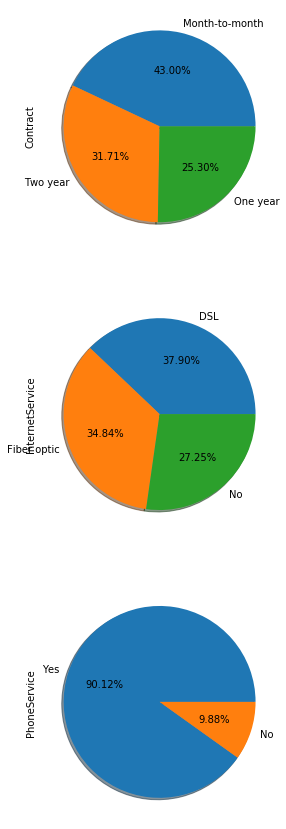

In [168]:
fig, ax =plt.subplots(3,1,figsize=(5,15))
client_df.Contract.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[0])
client_df.InternetService.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[1])
client_df.PhoneService.value_counts().plot(kind='pie',shadow=True,autopct='%1.2f%%', ax=ax[2])

Cellule pour analyser les résultats

## Continuous variables histograms

In [211]:
def histogram_plot(df, feature, n_bins):
    values = df[feature].values
    plt.figure(figsize=(12,6))
    plt.hist(values, bins = n_bins)
    plt.title(feature, fontsize = 20)
    plt.show()

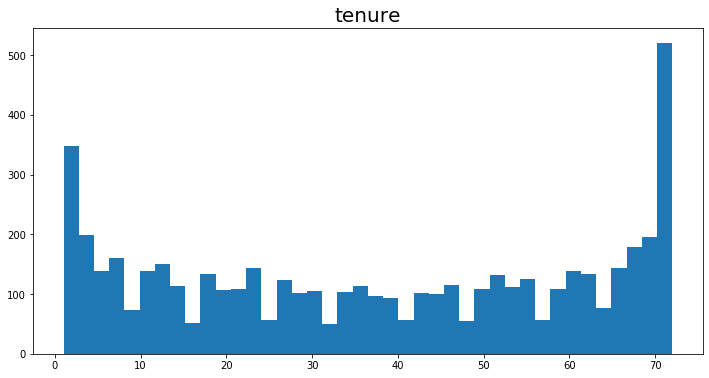

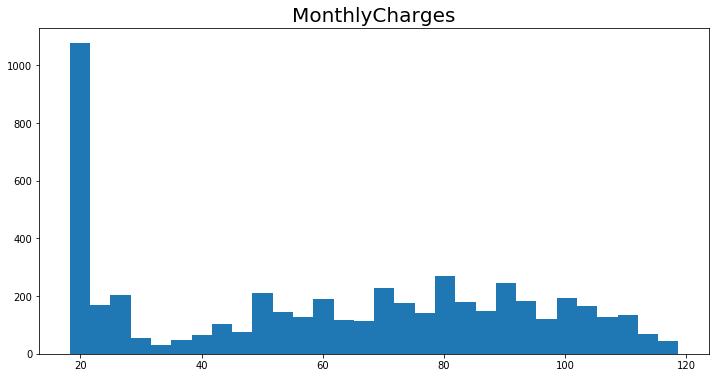

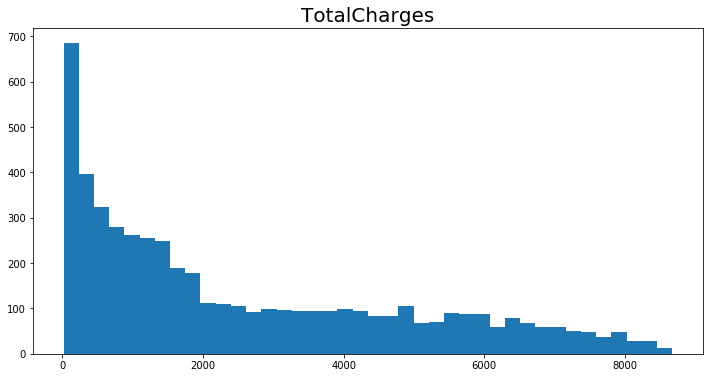

In [214]:
histogram_plot(client_df, 'tenure', 40)
histogram_plot(client_df, 'MonthlyCharges', 30)
histogram_plot(client_df, 'TotalCharges', 40)

## Multivariate descriptive statistics

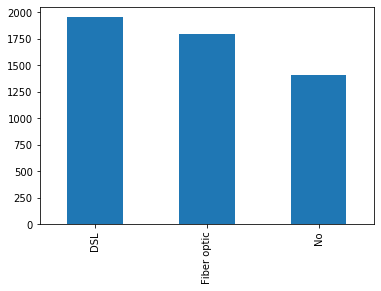

In [222]:
# essai avec matplotlib
client_df.InternetService.value_counts().plot.bar()
df = pd.Dataframe()
#print(client_df.Contract.value_counts())